<a href="https://colab.research.google.com/github/oviedokaren19/bc_G3_analisis_victimas/blob/feature%2Frama_nueva/rama_nueva/sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/archivo_limpio.csv')
display(df.head())

,FECHA_CORTE,NOM_RPT,COD_PAIS,PAIS,COD_ESTADO_DEPTO,ESTADO_DEPTO,VIGENCIA,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,EVENTOS
0,31/12/2024 12:00:00 a. m.,"REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...",48,COLOMBIA,0,SIN DEFINIR,1985,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena (Acreditado RA),Fisica,entre 60 y 110,0,0,0
1,31/12/2024 12:00:00 a. m.,"REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...",48,COLOMBIA,0,SIN DEFINIR,1985,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena (Acreditado RA),Ninguna,entre 12 y 17,0,0,0
2,31/12/2024 12:00:00 a. m.,"REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...",48,COLOMBIA,0,SIN DEFINIR,1985,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena (Acreditado RA),Ninguna,entre 18 y 28,0,0,0
3,31/12/2024 12:00:00 a. m.,"REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...",48,COLOMBIA,0,SIN DEFINIR,1985,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena (Acreditado RA),Ninguna,entre 29 y 59,0,0,0
4,31/12/2024 12:00:00 a. m.,"REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...",48,COLOMBIA,0,SIN DEFINIR,1985,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena (Acreditado RA),Ninguna,entre 60 y 110,0,0,0


In [4]:
# Filtra las filas que no están en el rango
df_filtrado = df[~df['VIGENCIA'].between(1985, 2015)]

# Elimina las filas originales, si es necesario
df.drop(df_filtrado.index, inplace=True)

# Si quieres eliminar las filas originales y guardar el resultado
# df = df[~df['VIGENCIA'].between(1985, 2015)]

# Mostrar el DataFrame resultante
#print(df)

In [5]:
df_filtrado.describe()

,COD_PAIS,COD_ESTADO_DEPTO,VIGENCIA,PARAM_HECHO,PER_OCU,PER_DECLA,EVENTOS
count,126025.0,126025.000000,126025.000000,126025.000000,126025.000000,126025.000000,126025.000000
mean,48.0,38.027772,2020.316572,5.611482,19.055092,19.113509,19.638270
std,0.0,30.060739,2.553615,3.925084,139.271389,132.809607,144.537712
min,48.0,0.000000,2016.000000,1.000000,0.000000,0.000000,0.000000
25%,48.0,11.000000,2018.000000,2.000000,0.000000,0.000000,0.000000
50%,48.0,27.000000,2021.000000,5.000000,1.000000,1.000000,1.000000
75%,48.0,66.000000,2023.000000,6.000000,3.000000,3.000000,3.000000
max,48.0,99.000000,2024.000000,20.000000,8030.000000,6974.000000,8766.000000


In [6]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126025 entries, 47264 to 529877
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   FECHA_CORTE       126025 non-null  object
 1   NOM_RPT           126025 non-null  object
 2   COD_PAIS          126025 non-null  int64 
 3   PAIS              126025 non-null  object
 4   COD_ESTADO_DEPTO  126025 non-null  int64 
 5   ESTADO_DEPTO      126025 non-null  object
 6   VIGENCIA          126025 non-null  int64 
 7   PARAM_HECHO       126025 non-null  int64 
 8   HECHO             126025 non-null  object
 9   SEXO              126025 non-null  object
 10  ETNIA             126025 non-null  object
 11  DISCAPACIDAD      126025 non-null  object
 12  CICLO_VITAL       126025 non-null  object
 13  PER_OCU           126025 non-null  int64 
 14  PER_DECLA         126025 non-null  int64 
 15  EVENTOS           126025 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 16

In [7]:
columns_to_drop = ['FECHA_CORTE', 'NOM_RPT', 'COD_PAIS', 'PAIS', 'PER_DECLA']
df_filtrado = df_filtrado.drop(columns=columns_to_drop)
display(df_filtrado.head())

,COD_ESTADO_DEPTO,ESTADO_DEPTO,VIGENCIA,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,EVENTOS
47264,0,SIN DEFINIR,2016,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Afrocolombiano (Acreditado RA),Ninguna,entre 18 y 28,0,0
47265,0,SIN DEFINIR,2016,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Afrocolombiano (Acreditado RA),Ninguna,entre 29 y 59,0,0
47266,0,SIN DEFINIR,2016,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Afrocolombiano (Acreditado RA),Ninguna,entre 60 y 110,0,0
47267,0,SIN DEFINIR,2016,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Ninguna,entre 18 y 28,0,0
47268,0,SIN DEFINIR,2016,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena,Fisica,entre 18 y 28,0,0


In [8]:
top_estados = df_filtrado['ESTADO_DEPTO'].value_counts().reset_index()
top_estados.columns = ['ESTADO_DEPTO', 'COUNT']
top_estados = top_estados.sort_values(by='COUNT', ascending=False)
#display(top_estados.head(6))
display(top_estados.head(6)[1:])

,ESTADO_DEPTO,COUNT
1,Nariño,8132
2,Cauca,7718
3,Valle del Cauca,7590
4,Antioquia,7265
5,Choco,6339


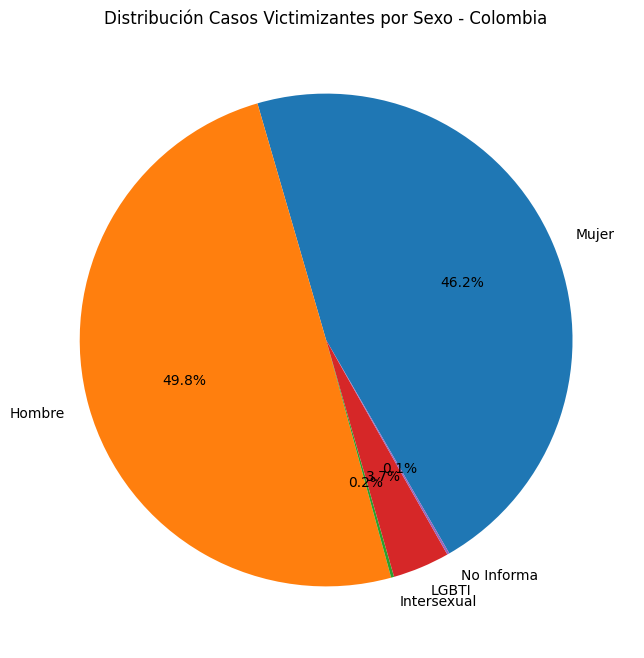

In [9]:
conteo_sexo = df_filtrado['SEXO'].value_counts()

# Randomize the order of the categories
conteo_sexo = conteo_sexo.sample(frac=1, random_state=64) # Added random_state for reproducibility

# Define explode for the largest slice (based on the new random order)
explode = [0.1 if sex == conteo_sexo.index[0] else 0 for sex in conteo_sexo.index]


plt.figure(figsize=(8, 8))
conteo_sexo.plot.pie(autopct='%1.1f%%', startangle=300)
plt.title('Distribución Casos Victimizantes por Sexo - Colombia')
plt.ylabel('')
plt.show()

In [10]:
# prompt: display(top_estados.head(6)[1:]) se aplique a top_estados_list = top_estados['ESTADO_DEPTO'].tolist() y que publique sólo 5 estados

top_estados_list = top_estados['ESTADO_DEPTO'].tolist()
display(top_estados_list[1:6])


['Nariño', 'Cauca', 'Valle del Cauca', 'Antioquia', 'Choco']

# Frecuencia
Se analiza el dataframe `df_filtrado` con más frecuencia de hechos victimizante, haciendo un top por departamento. Se crea la columna count que es la cantidad de hechos victimizantes según el código.

In [11]:
#top_estados_list = top_estados['ESTADO_DEPTO'].tolist()
top_estados_list_2 = top_estados_list[1:6]
df_top_states_2 = df_filtrado[df_filtrado['ESTADO_DEPTO'].isin(top_estados_list_2)]
#display(df_top_states.head())
hecho_counts_2 = df_top_states_2.groupby(['ESTADO_DEPTO', 'HECHO']).size().to_frame(name='Count').reset_index()
display(hecho_counts_2.head())

,ESTADO_DEPTO,HECHO,Count
0,Antioquia,Abandono o Despojo Forzado de Tierras,91
1,Antioquia,Acto terrorista / Atentados / Combates / Enfre...,257
2,Antioquia,Amenaza,1706
3,Antioquia,Confinamiento,563
4,Antioquia,Delitos contra la libertad y la integridad sex...,297


## Top de hechos por departamento

se crea el dataset top_hechos_per_state para contar los hechos por la categoría con más casos, que es el desplazamiento forzado.



In [12]:
top_hechos_per_state_2 = hecho_counts_2.loc[hecho_counts_2.groupby('ESTADO_DEPTO')['Count'].idxmax()]
display(top_hechos_per_state_2)

,ESTADO_DEPTO,HECHO,Count
6,Antioquia,Desplazamiento forzado,2475
22,Cauca,Desplazamiento forzado,2480
38,Choco,Desplazamiento forzado,2084
54,Nariño,Desplazamiento forzado,2798
70,Valle del Cauca,Desplazamiento forzado,2668


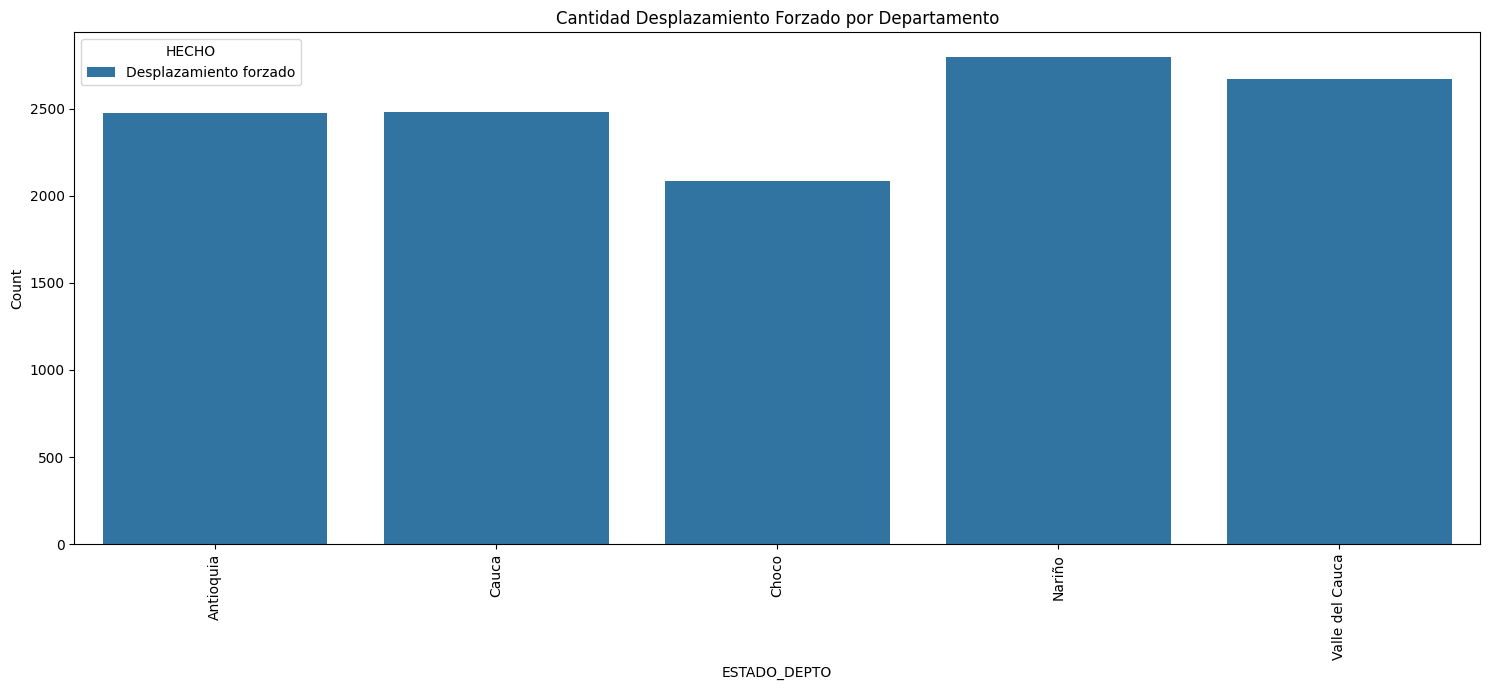

In [13]:
plt.figure(figsize=(15, 7))
sns.barplot(x='ESTADO_DEPTO', y='Count', hue='HECHO', data=top_hechos_per_state_2)
plt.title('Cantidad Desplazamiento Forzado por Departamento')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

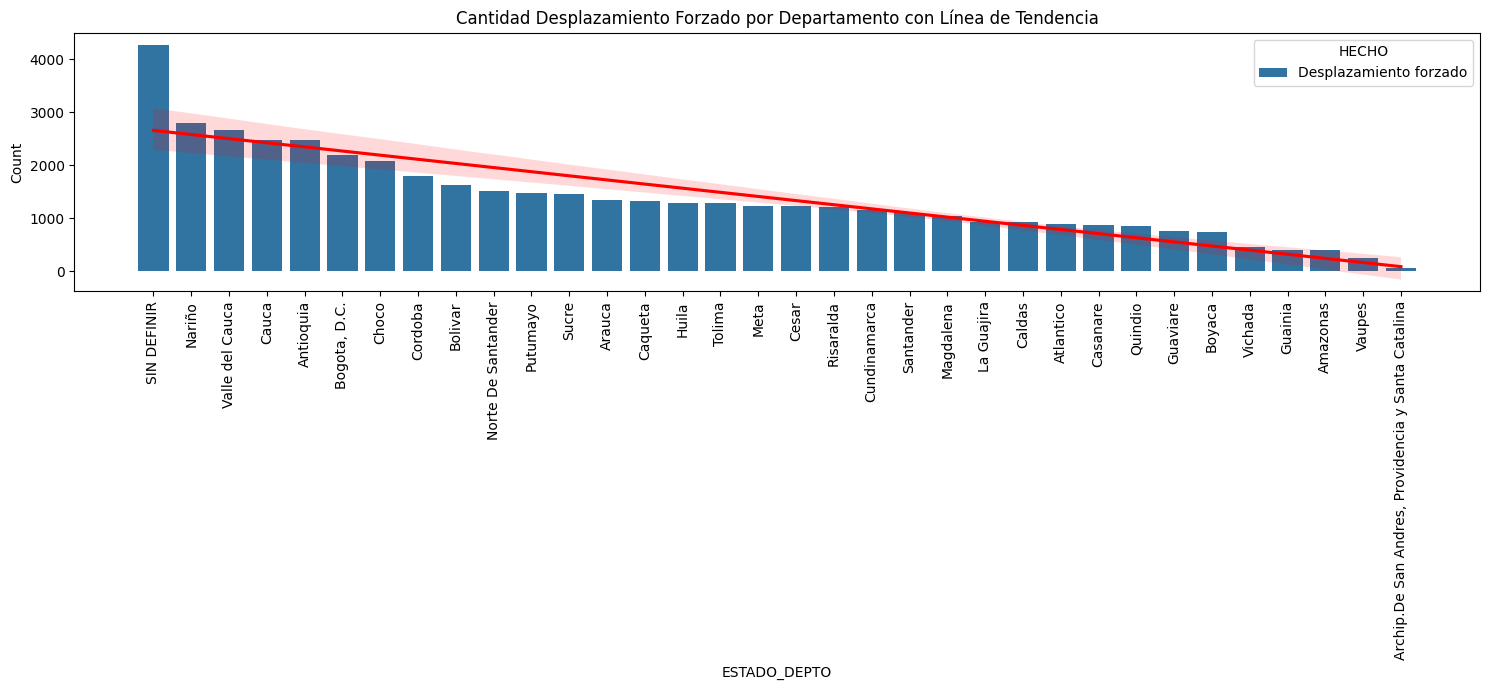

In [14]:
top_todos_depa = top_estados['ESTADO_DEPTO'].tolist()
df_top_states_2 = df_filtrado[df_filtrado['ESTADO_DEPTO'].isin(top_todos_depa)]
#display(df_top_states.head())
hecho_counts_2 = df_top_states_2.groupby(['ESTADO_DEPTO', 'HECHO']).size().to_frame(name='Count').reset_index()
top_hechos_per_state_2 = hecho_counts_2.loc[hecho_counts_2.groupby('ESTADO_DEPTO')['Count'].idxmax()]
#display(top_hechos_per_state)
top_hechos_per_state_sorted_2 = top_hechos_per_state_2.sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 7))
# Use the sorted data for the bar plot
sns.barplot(x='ESTADO_DEPTO', y='Count', hue='HECHO', data=top_hechos_per_state_sorted_2)

# Add a trend line
sns.regplot(x=np.arange(len(top_hechos_per_state_sorted_2)), y='Count', data=top_hechos_per_state_sorted_2, scatter=False, color='red')

plt.title('Cantidad Desplazamiento Forzado por Departamento con Línea de Tendencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


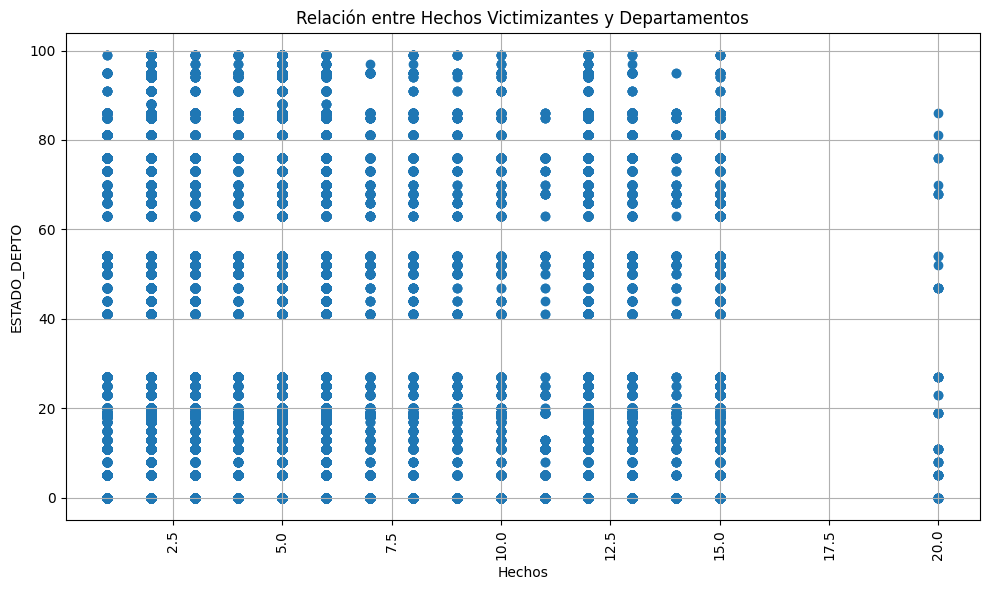

In [15]:
# Extract the data for the plot
# hechos = df_filtrado['HECHO']
# estados_depto = df_filtrado['ESTADO_DEPTO']

hechos = df_filtrado['PARAM_HECHO']
estados_depto = df_filtrado['COD_ESTADO_DEPTO']

# Create the scatter plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
plt.scatter(hechos, estados_depto)

plt.xlabel('Hechos')
plt.ylabel('ESTADO_DEPTO')
plt.title('Relación entre Hechos Victimizantes y Departamentos')
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [16]:
# Seleccionar solo las columnas con tipos de datos numéricos
columnas_numericas = df_filtrado.select_dtypes(include=np.number)

# Mostrar las columnas numéricas identificadas
print("Columnas numéricas encontradas:")
print(columnas_numericas.columns)

# Calcular el máximo de cada columna numérica
maximos = columnas_numericas.max()
print("\nMáximos de cada columna numérica:")
print(maximos)

# Calcular el mínimo de cada columna numérica
minimos = columnas_numericas.min()
print("\nMínimos de cada columna numérica:")
print(minimos)

Columnas numéricas encontradas:
Index(['COD_ESTADO_DEPTO', 'VIGENCIA', 'PARAM_HECHO', 'PER_OCU', 'EVENTOS'], dtype='object')

Máximos de cada columna numérica:
COD_ESTADO_DEPTO      99
VIGENCIA            2024
PARAM_HECHO           20
PER_OCU             8030
EVENTOS             8766
dtype: int64

Mínimos de cada columna numérica:
COD_ESTADO_DEPTO       0
VIGENCIA            2016
PARAM_HECHO            1
PER_OCU                0
EVENTOS                0
dtype: int64


In [17]:
unique_estados = df_filtrado[['COD_ESTADO_DEPTO', 'ESTADO_DEPTO']].drop_duplicates()
display(unique_estados)

,COD_ESTADO_DEPTO,ESTADO_DEPTO
47264,0,SIN DEFINIR
87452,5,Antioquia
104100,8,Atlantico
127535,11,"Bogota, D.C."
148379,13,Bolivar
158835,15,Boyaca
169542,17,Caldas
183277,18,Caqueta
205060,19,Cauca
226809,20,Cesar


In [18]:
unique_estados = df_filtrado[['HECHO', 'PARAM_HECHO']].drop_duplicates()
display(unique_estados)

,HECHO,PARAM_HECHO
47264,Acto terrorista / Atentados / Combates / Enfre...,1
47379,Amenaza,2
47681,Delitos contra la libertad y la integridad sex...,3
47772,Desaparición forzada,4
47825,Desplazamiento forzado,5
48273,Homicidio,6
48363,"Minas Antipersonal, Munición sin Explotar y Ar...",7
48391,Secuestro,8
48420,Tortura,9
48449,Vinculación de Niños Niñas y Adolescentes a Ac...,10


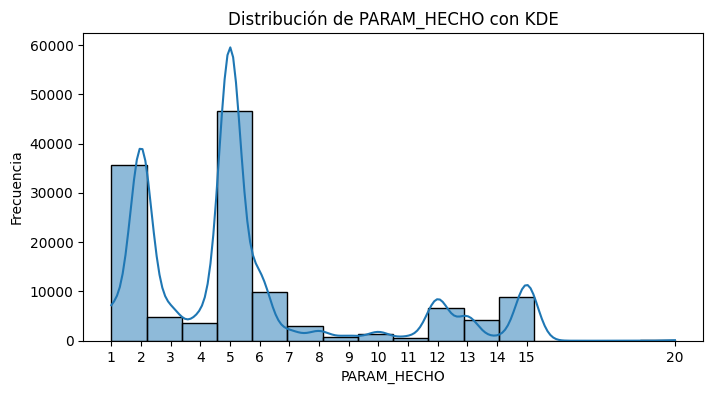

In [19]:
nombre_columna_a_graficar = 'PARAM_HECHO' # Ejemplo basado en tu código anterior

# Asegúrate de que la columna existe en tu DataFrame de columnas numéricas
if nombre_columna_a_graficar not in columnas_numericas.columns:
    print(f"La columna '{nombre_columna_a_graficar}' no es numérica o no existe.")
else:
    # Crear el histograma con la línea KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(data=columnas_numericas, x=nombre_columna_a_graficar, kde=True, bins=len(columnas_numericas[nombre_columna_a_graficar].unique()))

    plt.title(f'Distribución de {nombre_columna_a_graficar} con KDE')
    plt.xlabel(nombre_columna_a_graficar)
    plt.ylabel('Frecuencia')
    plt.xticks(columnas_numericas[nombre_columna_a_graficar].unique()) # Set x-axis ticks to all unique values
    plt.show()

In [20]:
# prompt: Cantidad de Hechos por PARAM_HECHOS de mayor a menor

param_hechos_counts = df_filtrado['PARAM_HECHO'].value_counts().sort_values(ascending=False)
print("Cantidad de Hechos por PARAM_HECHOS (de mayor a menor):")
param_hechos_counts

Cantidad de Hechos por PARAM_HECHOS (de mayor a menor):


,count
PARAM_HECHO,
5,46695
2,30732
6,9816
15,8952
12,6551
1,4826
3,4791
13,3749
4,3638


In [21]:
param_depto_counts = df_filtrado['COD_ESTADO_DEPTO'].value_counts().sort_values(ascending=False)
print("Cantidad de Hechos por COD_ESTADO_DEPTO (de mayor a menor):")
param_depto_counts

Cantidad de Hechos por COD_ESTADO_DEPTO (de mayor a menor):


,count
COD_ESTADO_DEPTO,
0,16316
52,8132
19,7718
76,7590
5,7265
27,6339
11,6331
54,4151
86,4049


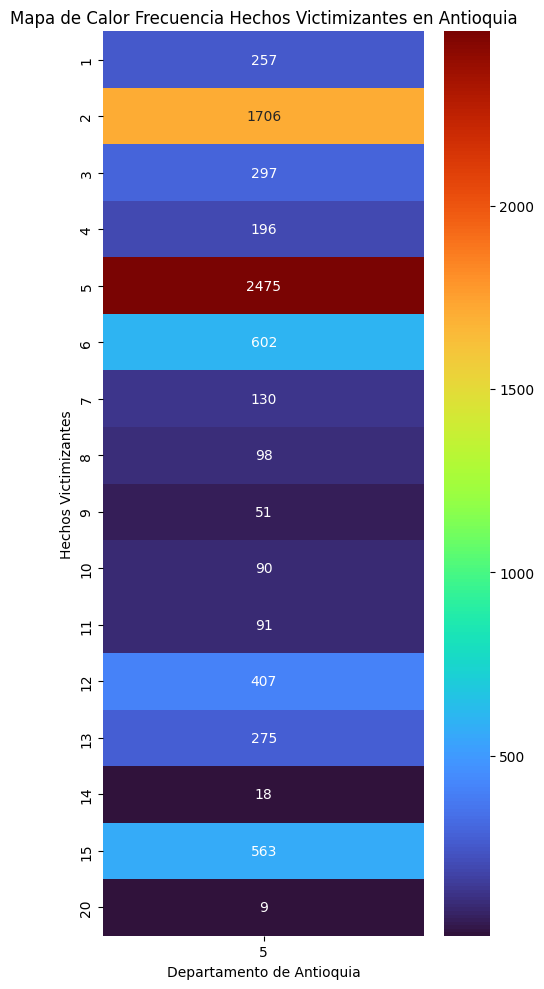

In [22]:
# Filter the data for COD_ESTADO_DEPTO == 5
df_codigo_5 = df_filtrado[df_filtrado['COD_ESTADO_DEPTO'] == 5]

param_hechos_counts_codigo_5 = df_codigo_5['PARAM_HECHO'].value_counts().sort_index()
heatmap_data_codigo_5 = param_hechos_counts_codigo_5.to_frame(name=5)
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data_codigo_5, cmap='turbo', annot=True, fmt='d')

plt.title('Mapa de Calor Frecuencia Hechos Victimizantes en Antioquia')
plt.xlabel('Departamento de Antioquia')
plt.ylabel('Hechos Victimizantes')
plt.tight_layout()
plt.show()


# Relación entre hechos y departamentos con línea de tendencias

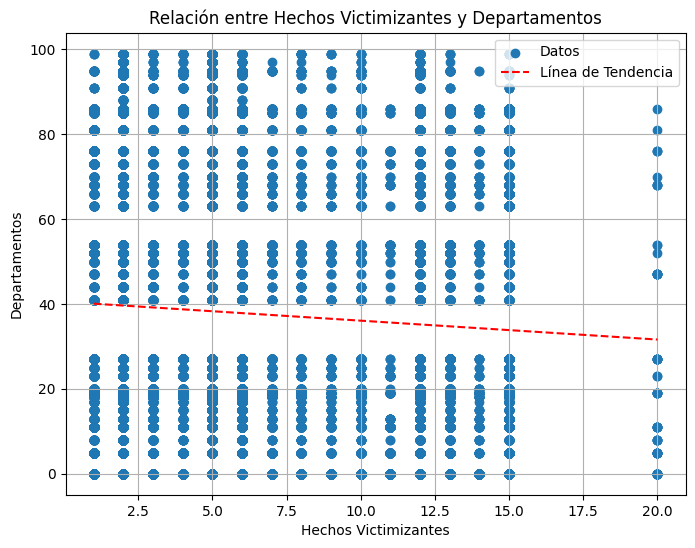

In [23]:
hechos = df_filtrado['PARAM_HECHO']
departamentos = df_filtrado['COD_ESTADO_DEPTO']

# Calcular la línea de regresión lineal (polinomio de grado 1)
coeficientes = np.polyfit(hechos, departamentos, 1)
linea_tendencia = np.poly1d(coeficientes)
# Crear puntos para la línea de tendencia
rango_hechos = np.linspace(hechos.min(), hechos.max(), 100)
valores_tendencia = linea_tendencia(rango_hechos)
# Crear grafico dispersion
plt.figure(figsize=(8, 6))
plt.scatter(hechos, departamentos, label='Datos')
# Agregar la línea de tendencia al gráfico
plt.plot(rango_hechos, valores_tendencia, color='red', linestyle='--', label='Línea de Tendencia')

plt.xlabel('Hechos Victimizantes')
plt.ylabel('Departamentos')
plt.title('Relación entre Hechos Victimizantes y Departamentos')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# prompt: quiero crear un archivo .csv de df_filtrado

#df_filtrado.to_csv('df_filtrado.csv', index=False)

#df_filtrado.to_csv('df_filtrado_index.csv', index=True)


In [25]:
# prompt: necesito imprimir display(top_estados.head(6)) del segundo en adelante, restando el primero

display(top_estados.head(6)[1:])

,ESTADO_DEPTO,COUNT
1,Nariño,8132
2,Cauca,7718
3,Valle del Cauca,7590
4,Antioquia,7265
5,Choco,6339


In [26]:
# se crea un data set con los datos de los 5 departamentos top

df_filtrado_top_estados = df_filtrado[df_filtrado['ESTADO_DEPTO'].isin(top_estados.head(6)[1:]['ESTADO_DEPTO'])]
#display(df_filtrado_top_estados)

Clustering usando kmeans

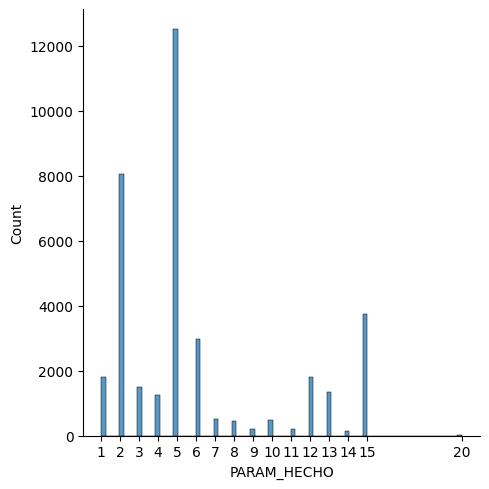

In [34]:
sns.displot(data=df_filtrado_top_estados, x='PARAM_HECHO')
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique()) # Set x-axis ticks to all unique values
plt.show()


([<matplotlib.axis.XTick at 0x7e847aa993d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

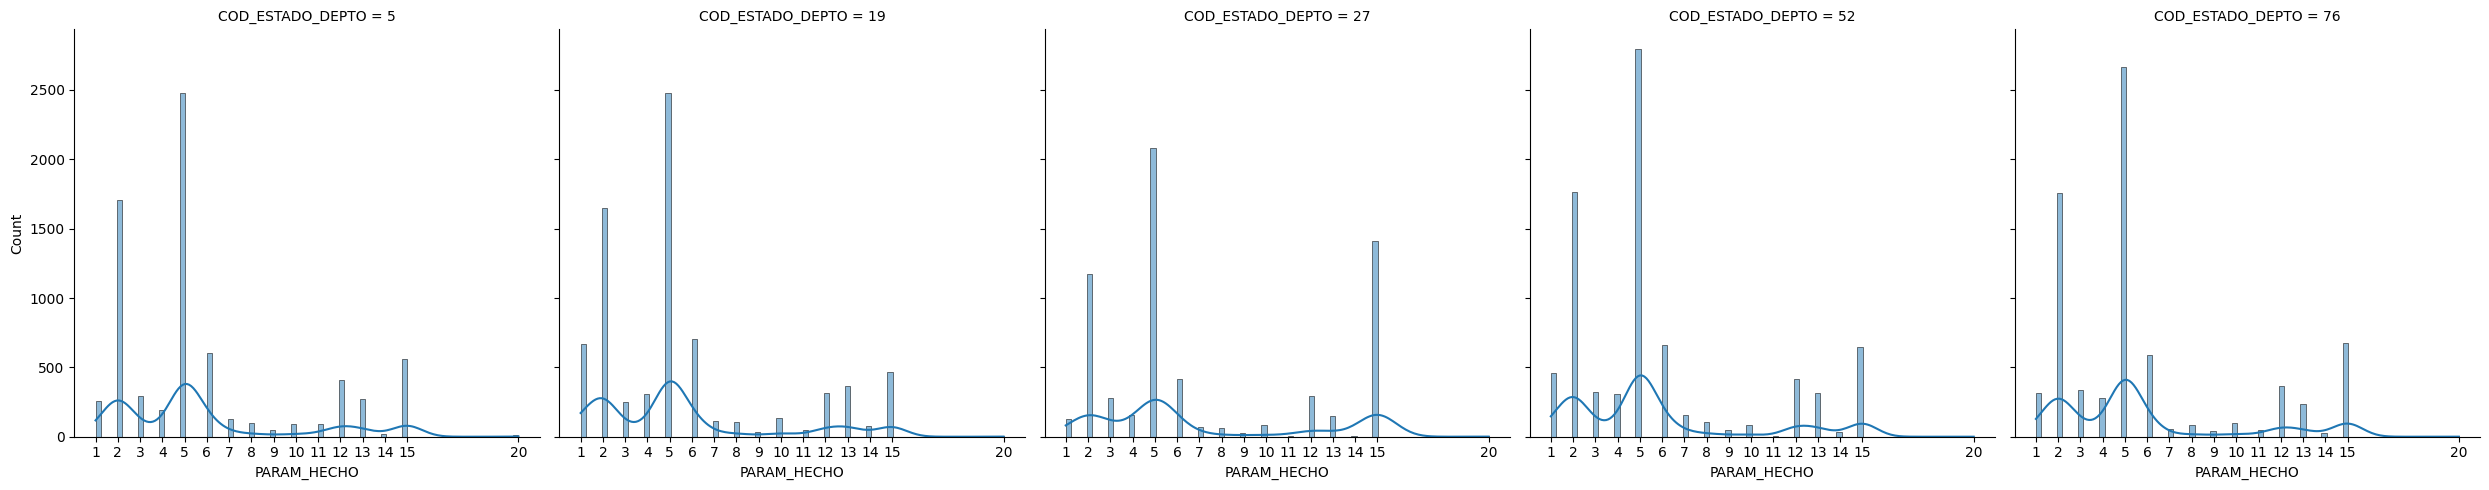

In [35]:
sns.displot(data=df_filtrado_top_estados,x= 'PARAM_HECHO', kde=True, col='COD_ESTADO_DEPTO')
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique())

([<matplotlib.axis.XTick at 0x7e84c5246310>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

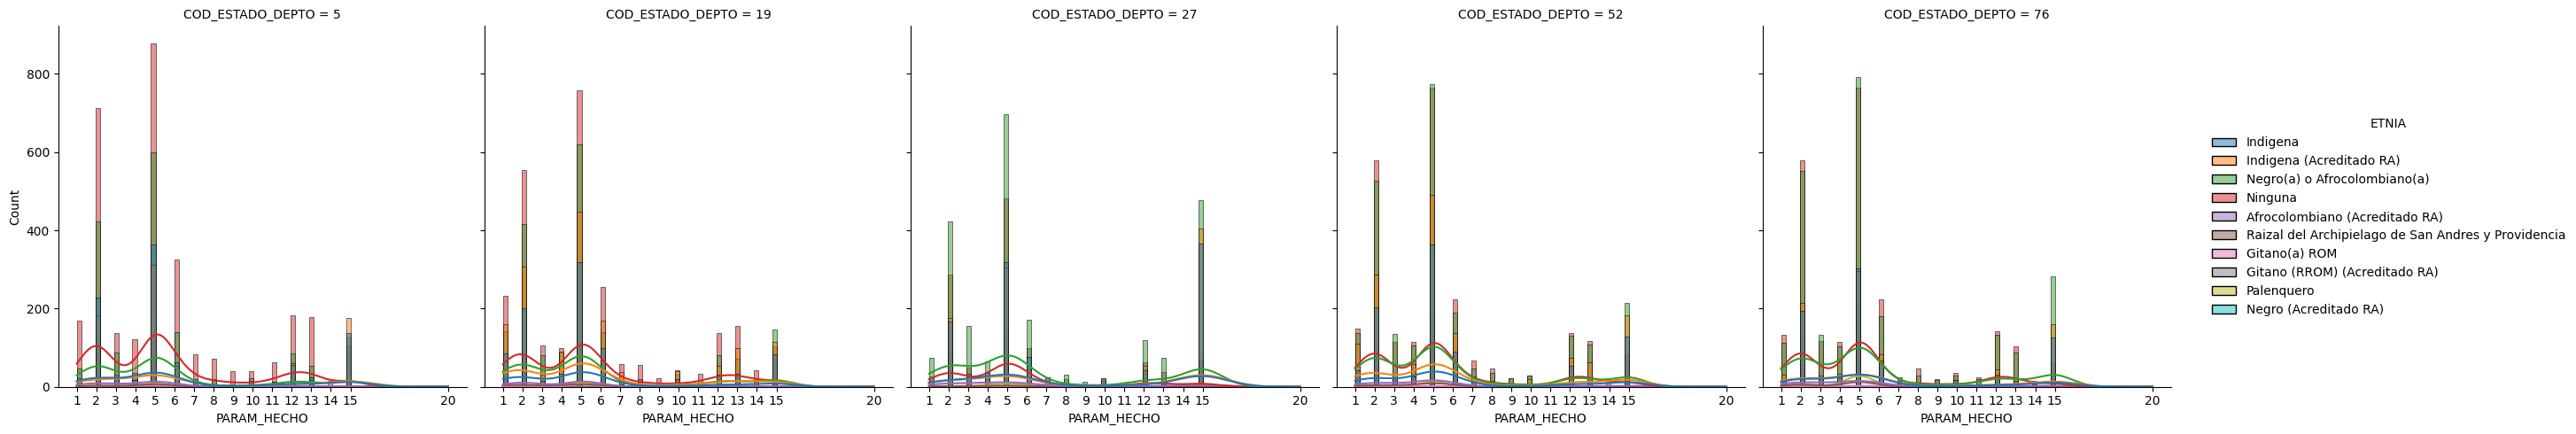

In [36]:
#sns.displot(data=pinguinos,x= 'body_mass_g',kde=True, col='island',hue='species')
sns.displot(data=df_filtrado_top_estados,x= 'PARAM_HECHO', kde=True, col='COD_ESTADO_DEPTO', hue='ETNIA')
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique())

([<matplotlib.axis.XTick at 0x7e84787a1990>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

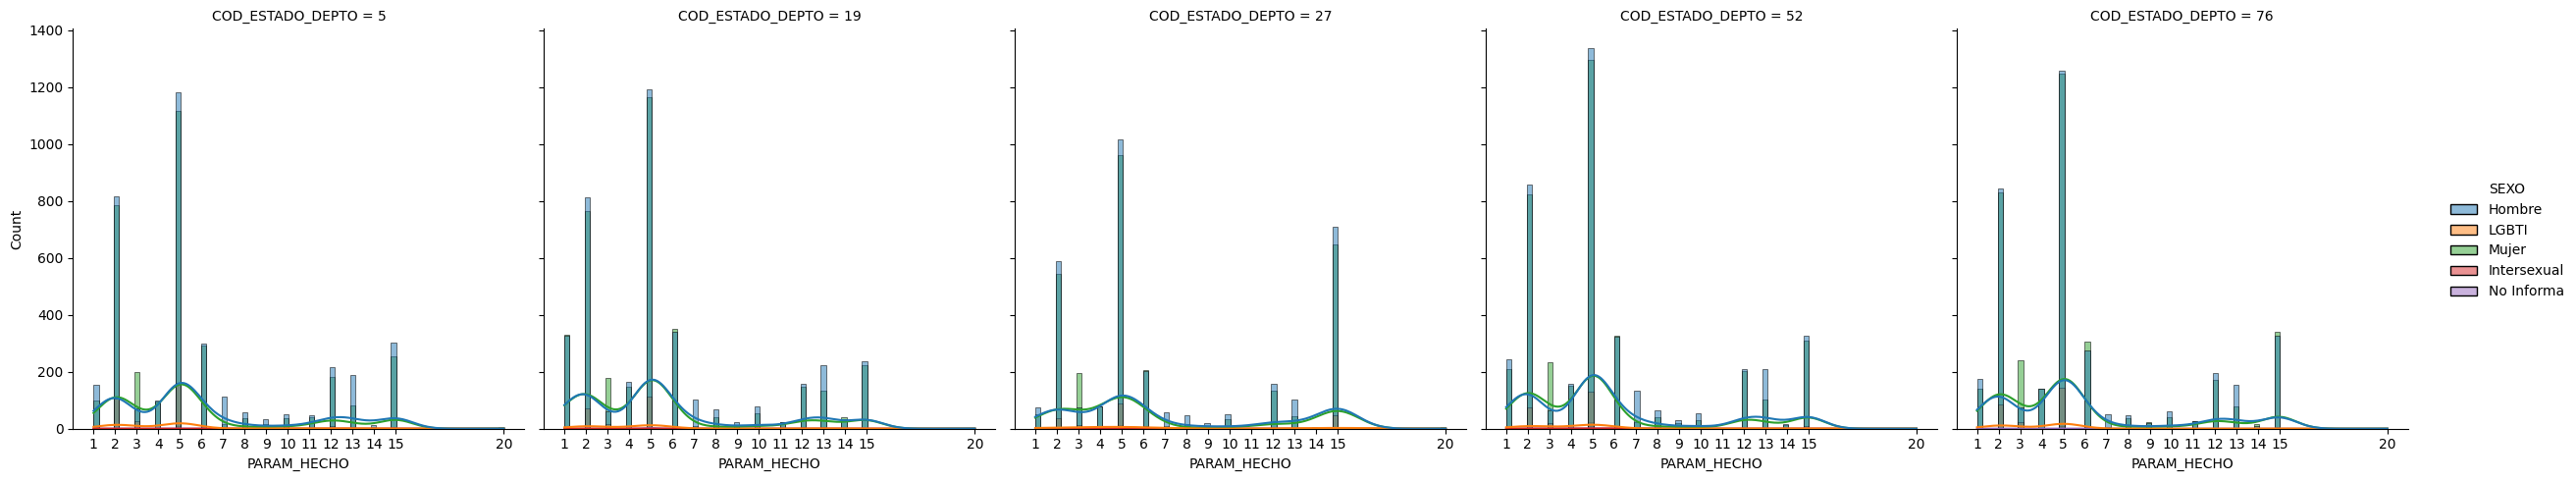

In [37]:
sns.displot(data=df_filtrado_top_estados,x= 'PARAM_HECHO', kde=True, col='COD_ESTADO_DEPTO', hue='SEXO')
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique())

([<matplotlib.axis.XTick at 0x7e84774631d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

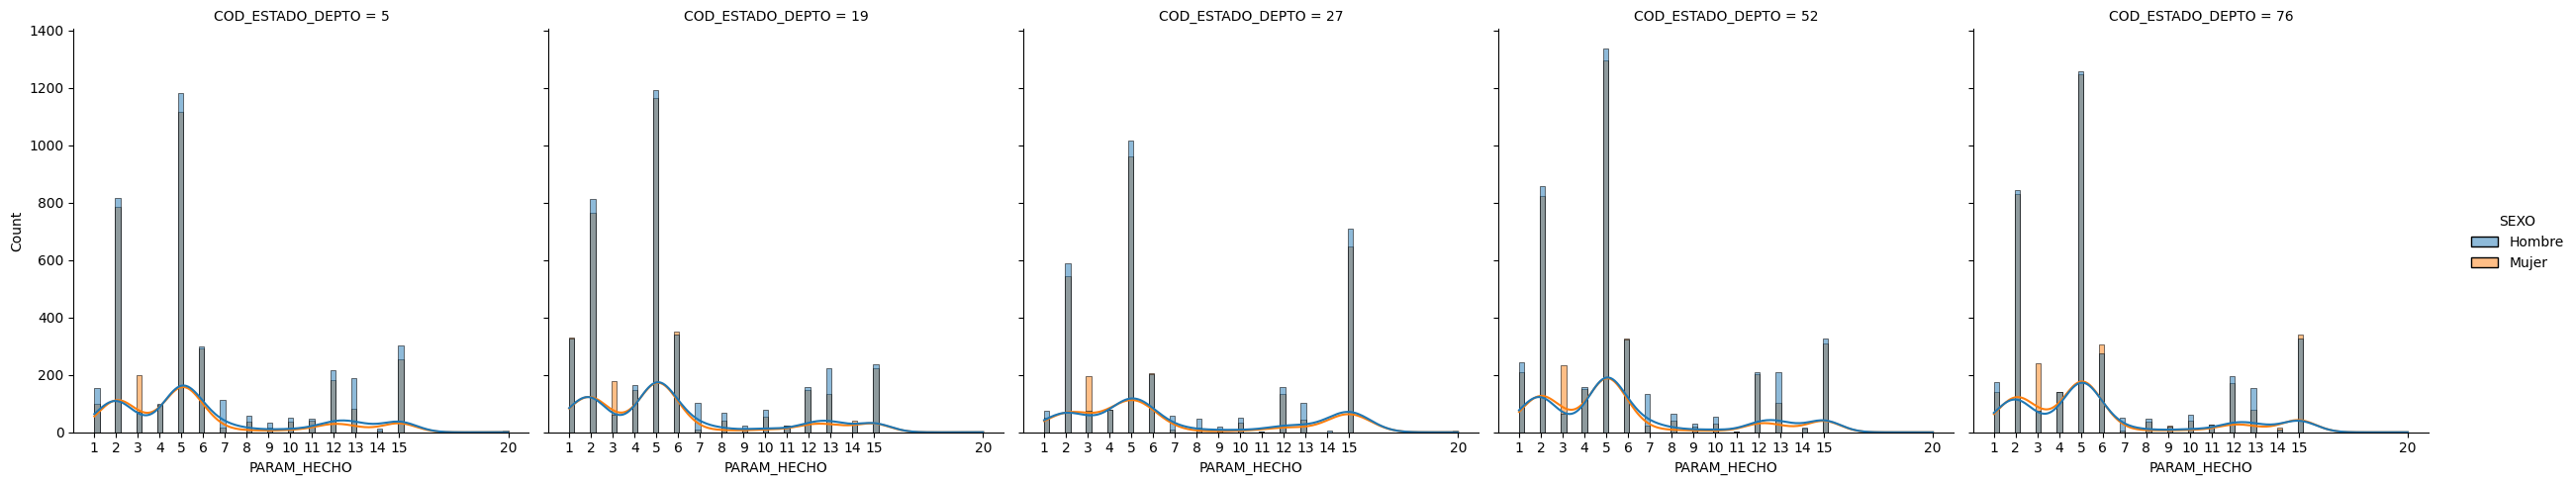

In [38]:
# prompt: # prompt: sns.displot(data=df_filtrado_top_estados,x= 'PARAM_HECHO', kde=True, col='COD_ESTADO_DEPTO', hue='SEXO') pero solo la categoria Mujer y hombre

df_sexos_filtrados = df_filtrado_top_estados[df_filtrado_top_estados['SEXO'].isin(['Mujer','Hombre'])]
sns.displot(data=df_sexos_filtrados, x='PARAM_HECHO', kde=True, col='COD_ESTADO_DEPTO', hue='SEXO')
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique())

([<matplotlib.axis.XTick at 0x7e8476c9cf90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

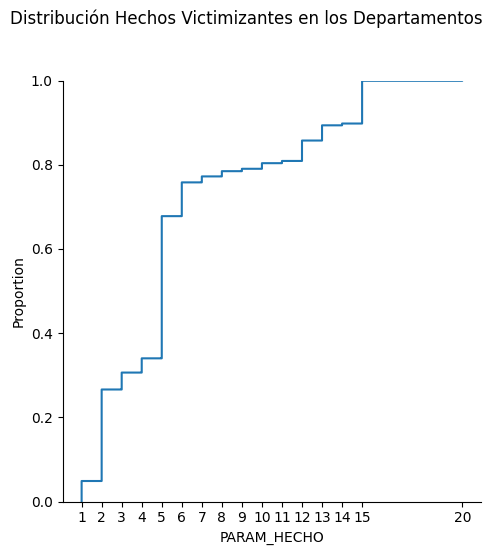

In [39]:
sns.displot(data=df_filtrado_top_estados,x= 'PARAM_HECHO',kind='ecdf').fig.suptitle('Distribución Hechos Victimizantes en los Departamentos', y=1.10)
plt.xticks(df_filtrado_top_estados['PARAM_HECHO'].unique())



In [40]:
# prompt: crear una columna "numero_indexado" en df_filtrado_top_estados, asignar 1 cuando COD_ESTADO_DEPTO es = 5, 2 cuando COD_ESTADO_DEPTO es = 19, 3 cuando COD_ESTADO_DEPTO es = 27, 4 cuando COD_ESTADO_DEPTO es = 52 y 5 cuando COD_ESTADO_DEPTO es = 76

def asignar_numero_indexado(codigo):
  if codigo == 5:
    return 1
  elif codigo == 19:
    return 2
  elif codigo == 27:
    return 3
  elif codigo == 52:
    return 4
  elif codigo == 76:
    return 5
  else:
    return None # Or any other value for codes not in the list

df_filtrado_top_estados['numero_indexado'] = df_filtrado_top_estados['COD_ESTADO_DEPTO'].apply(asignar_numero_indexado)

#display(df_filtrado_top_estados.head())


/tmp/ipython-input-40-145065377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_top_estados['numero_indexado'] = df_filtrado_top_estados['COD_ESTADO_DEPTO'].apply(asignar_numero_indexado)
